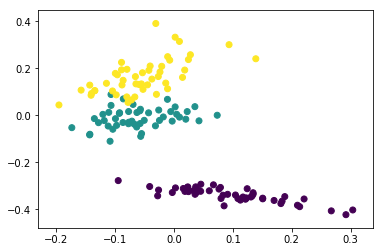

In [1]:
import sys
sys.path.append('../Modules')

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
%matplotlib inline

from PCA import Autoencoder

iris = datasets.load_iris()

autoencoder = Autoencoder(4, 3, 2)
autoencoder.fit(iris.data, 10000, 1e-3)

Z = autoencoder.transform(iris.data)
plt.scatter(Z[:, 0], Z[:, 1], c=iris.target)
plt.show()

In [3]:
import numpy as np
import pandas as pd

from keras.layers import Input, Dense
from keras.models import Model
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from sklearn.model_selection import train_test_split
# data = pd.read_csv("../input/train.csv",header=0)
# x_data = data.values[:,1:]
# y_data = data.label
# x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)

# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# print(x_train.shape)
# print(x_test.shape)